# Import the Lyft Dataset and Upload the relevant files to Colab

In [1]:
# Import data from csv

import pandas as pd

df_lyft = pd.read_csv("train.csv")
df_lyft.head()

,Id,PredictionString
0,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,2680.2830359778527 698.1969292852777 -18.04776...
1,edf37c1fb1024ba0c1f53ebbf10b6797f781199a9f0e4e...,1208.642684768659 1585.1812946970927 -23.56236...
2,1841b7895e7163a2c1be87e8c1740e759a910cd59157b8...,848.9346793681768 2587.2870557176507 -20.15995...
3,a970c764e7abd7ebc2cc4599a6e3ae58c9773ea3c9cf1d...,1994.4320280494098 1128.30164336183 -18.054752...
4,b909de93ba19460eeea58074ccc1ef6bb302435f37b48c...,1030.3877156973385 1667.13131694941 -23.764820...


In [2]:
# Clean-up according to
# https://www.kaggle.com/gaborfodor/eda-3d-object-detection-challenge

from tqdm import tqdm

colnames = [
    "sample_id",
    "object_id",
    "center_x",
    "center_y",
    "center_z",
    "width",
    "length",
    "height",
    "yaw",
    "class_name"
]

objects = []
for sample_id, data in tqdm(df_lyft.values[:]):
  cur_data = data.split()
  size_data = len(cur_data)
  for i in range(size_data // 8):
    x, y, z, w, l, h, yaw, c = tuple(cur_data[(i*8):(i+1)*8])
    objects.append([sample_id, i, x, y, z, w, l, h, yaw, c])

df_lyft = pd.DataFrame(objects, columns=colnames)
df_lyft.head()

100%|██████████| 22680/22680 [00:00<00:00, 33061.46it/s]


,sample_id,object_id,center_x,center_y,center_z,width,length,height,yaw,class_name
0,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,0,2680.2830359778527,698.1969292852777,-18.04776692365821,2.064,5.488,2.053,2.6041643845397946,car
1,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,1,2691.997461646401,660.8016536569899,-18.674258695658377,1.818,4.57,1.608,-0.33517602468486984,car
2,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,2,2713.6075009338388,694.4034809694599,-18.589971933264334,1.779,4.992,1.62,2.579455758321168,car
3,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,3,2679.986916931015,706.9101495091695,-18.349594424165822,1.798,3.903,1.722,2.5861656766206993,car
4,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,4,2659.352095715659,719.4174623706303,-18.442998898501283,1.936,4.427,1.921,2.601798964714126,car


In [3]:
df_lyft[df_lyft["sample_id"] == df_lyft.iloc[0, 0]]

,sample_id,object_id,center_x,center_y,center_z,width,length,height,yaw,class_name
0,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,0,2680.2830359778527,698.1969292852777,-18.04776692365821,2.064,5.488,2.053,2.6041643845397946,car
1,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,1,2691.997461646401,660.8016536569899,-18.674258695658377,1.818,4.57,1.608,-0.33517602468486984,car
2,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,2,2713.6075009338388,694.4034809694599,-18.589971933264334,1.779,4.992,1.62,2.579455758321168,car
3,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,3,2679.986916931015,706.9101495091695,-18.349594424165822,1.798,3.903,1.722,2.5861656766206993,car
4,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,4,2659.352095715659,719.4174623706303,-18.442998898501283,1.936,4.427,1.921,2.601798964714126,car
5,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,5,2705.199576267366,687.6053718669459,-18.13608710950738,1.849,4.586,1.801,2.6187666817281556,car
6,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,6,2712.706309822551,690.895857094069,-18.43179693610965,1.848,4.829,1.528,2.571936879901208,car
7,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,7,2755.5551865955817,646.2995181065994,-18.04141609089024,2.003,5.109,1.875,-0.5583518579067484,car
8,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,8,2721.868054568993,685.1596225679214,-17.64155351660436,2.539,7.671,3.287,2.609719767554756,truck
9,db8b47bd4ebdf3b3fb21598bb41bd8853d12f8d2ef25ce...,9,2723.602359479293,680.1666687198758,-17.298964332024624,2.557,7.637,3.594,2.598576712925146,truck


In [4]:
# Distinct classes

df_lyft["class_name"].value_counts()

class_name
car                  534911
other_vehicle         33376
pedestrian            24935
bicycle               20928
truck                 14164
bus                    8729
motorcycle              818
animal                  186
emergency_vehicle       132
Name: count, dtype: int64

In [5]:
# Filter down to samples where there is at least one "car" in image

print(f"Original df_lyft: {df_lyft.shape[0]:,.0f} rows")

car_sample_ids = df_lyft[df_lyft["class_name"] == "car"]["sample_id"].drop_duplicates().tolist()
df_lyft = df_lyft[df_lyft["sample_id"].isin(car_sample_ids)]

print(f"Filtered df_lyft: {df_lyft.shape[0]:,.0f} rows")

Original df_lyft: 638,179 rows
Filtered df_lyft: 638,179 rows


In [6]:
# Load sample_data.json

import json

with open("train_data/sample_data.json", "r") as f:
  sample_data = json.load(f)

In [7]:
# How many images per sample?

from collections import defaultdict

sample_to_image = defaultdict(set)
for file in sample_data:
  if file["filename"].startswith("image"):
    sample_to_image[file["sample_token"]].add(file["filename"])
sample_to_image = dict(sample_to_image)

sample_images_counts: list[tuple[str, int]] = []
for sample, images in sample_to_image.items():
  sample_images_counts.append((sample, len(images)))
df_sample_image_counts = pd.DataFrame(sample_images_counts, columns=["Sample", "Images"])
df_sample_image_counts["Images"].value_counts()

Images
7    22680
Name: count, dtype: int64

In [8]:
# Randomly select 1,000 images from list of images

import os
from random import sample

images = os.listdir("train_images")
image_sample = sample(images, k=1_000)

In [9]:
# Filter down df_lyft to the relevant tokens

image_sample_json_paths = [f"images/{im}" for im in image_sample]

sample_data_filtered: list[dict] = []
for file in sample_data:
  if file["filename"] in image_sample_json_paths:
    sample_data_filtered.append(file)

image_sample_ids = [file["sample_token"] for file in sample_data_filtered]

df_lyft_filtered = df_lyft[df_lyft["sample_id"].isin(image_sample_ids)]
distinct_sample_ids = len(df_lyft_filtered["sample_id"].drop_duplicates())
print(f"Filtered df_lyft has {len(df_lyft_filtered):,.0f} objects")
print(f"Filtered df_lyft has {distinct_sample_ids:,.0f} distinct sample_id values")
df_lyft_filtered.head()

Filtered df_lyft has 26,820 objects
Filtered df_lyft has 978 distinct sample_id values


,sample_id,object_id,center_x,center_y,center_z,width,length,height,yaw,class_name
1167,0c8ba7bc55e6c72765fd84548182777b5acead5a259b8a...,0,2564.722847984139,753.8595771861796,-18.765085688236613,1.816,4.423,1.736,-0.5606618614007068,car
1168,0c8ba7bc55e6c72765fd84548182777b5acead5a259b8a...,1,2513.437077965784,686.8871354770895,-20.11515944432121,2.115,5.22,2.0,0.6756927288173467,car
1169,0c8ba7bc55e6c72765fd84548182777b5acead5a259b8a...,2,2481.1385926982975,823.9698679839912,-18.425514550477953,1.959,6.132,2.319,2.60316279620557,car
1170,0c8ba7bc55e6c72765fd84548182777b5acead5a259b8a...,3,2639.74366133123,738.9707304841445,-17.85872338527621,2.75,10.638,3.32,2.590194127216888,other_vehicle
1171,0c8ba7bc55e6c72765fd84548182777b5acead5a259b8a...,4,2552.66785476914,765.2829239476878,-18.703365734739553,1.908,4.708,1.87,-0.5606618614007068,car


In [10]:
# QC: images from same sample

from collections import defaultdict

sample_to_image_filtered = defaultdict(list)
for file in sample_data_filtered:
  sample_to_image_filtered[file["sample_token"]].append(file["filename"])
sample_to_image_filtered = dict(sample_to_image_filtered)

for token, images in sample_to_image_filtered.items():
  if len(images) > 1:
    print(f"Sample {token} has {len(images):,.0f} associated images")

Sample e4c1c32ee93bf15ad365bfca328f308fb3f211f7f36d61f223df551c49b67bcf has 2 associated images
Sample dc115e50017fdde849a8ed0ea71ff3db140bd1e487c787a890fb8beb3f02800d has 2 associated images
Sample 36ae4788d6863eb71fbb77b3d9064d578d382e09bff98124be3f39719dd2e7f2 has 2 associated images
Sample 6228114bf369f2cd48a9f3af8e20f8424fc37ae67df022493e35e4267b1331fc has 2 associated images
Sample 5821c480dc6812a120303967431f75c4a78524e933bdb469b2ed1d03e00ff37e has 2 associated images
Sample 85bf1b1867ac4538fa02ed0c97376ef12373d642ad6f63c4195f4ee69b8c849b has 2 associated images
Sample 1b41561605ec37217526f7ee3f3740f49b983c3c7b17f133ee382213910c3111 has 2 associated images
Sample 86635b3b028213bfdf0d863a64afe910f4f4954e064a3fbec2145856f5cee100 has 2 associated images
Sample 217a469dc0333724b88e4a4d4f7c844f171288bd4c580f7f3217556f9677dabb has 2 associated images
Sample 51e86550ab53da4d995365a4f6a5105706aac1cdc23d27849f86b687eceb6e7d has 2 associated images
Sample 78c0d6d61aa696008e6c6b821cd676b14

As can be seen above, the images come in 7 image "samples" and the labels are made on the sample-level.

Thus, it doesn't make so much sense to put the images together one-by-one. We'll take 100 "samples" of them and evaluate the images.

In [13]:
# Sample the different "sample_id" values and get filtered df_lyft and images

sample_ids = df_lyft["sample_id"].drop_duplicates().tolist()
filtered_sample_ids = sample(sample_ids, k=100)

df_lyft_filtered = df_lyft[df_lyft["sample_id"].isin(filtered_sample_ids)]

images_by_sample_filtered = defaultdict(list)
for file in sample_data:
  if (
      file["sample_token"] in filtered_sample_ids
      and file["filename"].startswith("images")
  ):
    cur_sample_token = file["sample_token"]
    cur_filename = file["filename"].replace("images/", "")
    images_by_sample_filtered[cur_sample_token].append(cur_filename)
images_by_sample_filtered = dict(images_by_sample_filtered)

total_images = sum([len(ims) for ims in images_by_sample_filtered.values()])
print(f"Sampled {total_images:,.0f} images")
print(f"Sampled {len(filtered_sample_ids):,.0f} samples")

Sampled 700 images
Sampled 100 samples


In [ ]:
# Save down the filtered df_lyft and copy images into sample-level folders

from shutil import copyfile

df_lyft_filtered.to_csv("train_filtered.csv")

os.makedirs("sample_images", exist_ok=True)

cwd = os.getcwd()
for sample, ims in tqdm(images_by_sample_filtered.items()):
  output_dir = os.path.join(cwd, "sample", sample)
  if not os.path.isdir(output_dir):
    os.makedirs(output_dir, exist_ok=False)
  for im in ims:
    full_path = os.path.join(cwd, "train_images", im)
    copyfile(full_path, os.path.join(output_dir, im))

## Perform some EDA

In [17]:
df_eda = df_lyft[["sample_id", "class_name", "object_id"]].groupby(["sample_id", "class_name"]).count().reset_index()

In [24]:
# Objects per image

df_eda_objects = df_eda[["sample_id", "object_id"]].groupby("sample_id").sum().reset_index()
df_eda_objects["object_id_by_image"] = df_eda_objects["object_id"] / 7
n_objects_per_image = df_eda_objects["object_id_by_image"].mean()
print(f"There are {n_objects_per_image:,.3f} objects per image")

There are 4.020 objects per image


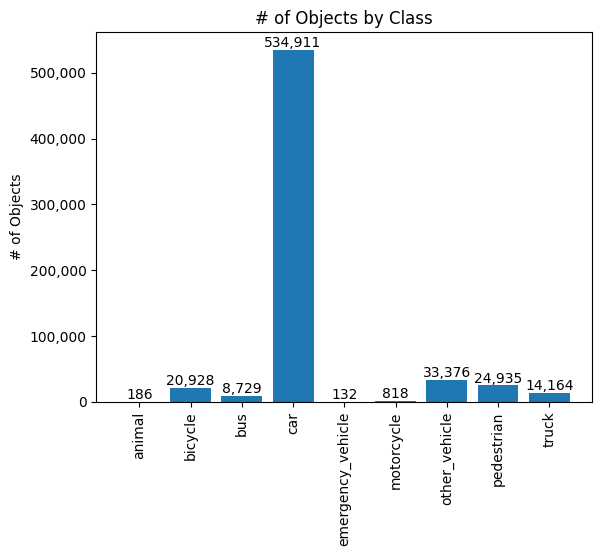

In [37]:
# Plot of classes

import matplotlib.pyplot as plt

df_eda_classes = df_eda[["class_name", "object_id"]].groupby("class_name").sum().reset_index()
df_eda_classes.sort_values("object_id", ascending=False)

plt.bar(df_eda_classes["class_name"], df_eda_classes["object_id"])
plt.ylabel("# of Objects")
plt.title("# of Objects by Class")
plt.xticks(rotation=90)
_yticks = [0, 100_000, 200_000, 300_000, 400_000, 500_000]
plt.yticks(_yticks, labels=[f"{tick:,.0f}" for tick in _yticks])

for i in range(len(df_eda_classes)):
    _height = df_eda_classes["object_id"][i]
    plt.text(i, _height, f"{_height:,.0f}", ha='center', va='bottom')

plt.show()

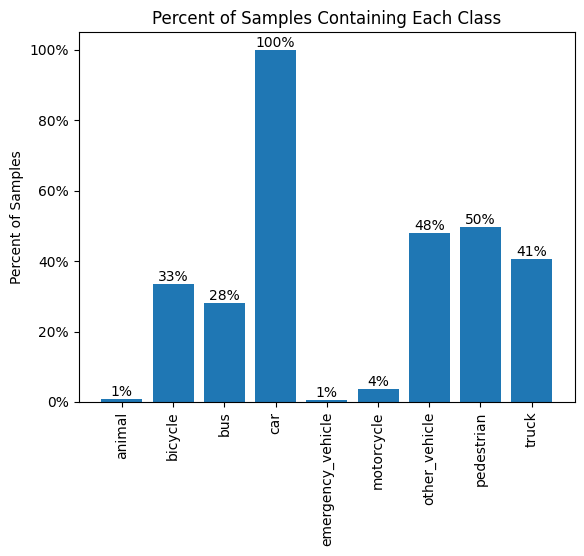

In [45]:
# Classes by Sample

df_eda_class_by_sample = df_eda[["sample_id", "class_name"]].drop_duplicates()
classes = df_lyft["class_name"].drop_duplicates().sort_values()
n_samples = len(df_lyft["sample_id"].drop_duplicates())

class_by_sample = []
for _class in classes:
    cur_df = df_eda_class_by_sample[df_eda_class_by_sample["class_name"] == _class]
    class_by_sample.append((_class, cur_df.shape[0]))

df_eda_class_by_sample = pd.DataFrame(class_by_sample, columns=["class_name", "n_samples"])
df_eda_class_by_sample["pct_samples"] = df_eda_class_by_sample["n_samples"] / n_samples

plt.bar(df_eda_class_by_sample["class_name"], df_eda_class_by_sample["pct_samples"])
plt.title("Percent of Samples Containing Each Class")
plt.xticks(rotation=90)
plt.ylabel("Percent of Samples")
_yticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.yticks(_yticks, labels=[f"{tick:,.0%}" for tick in _yticks])

for i in range(len(df_eda_class_by_sample)):
    _height = df_eda_class_by_sample["pct_samples"][i]
    plt.text(i, _height, f"{_height:,.0%}", ha='center', va='bottom')

plt.show()
